In [213]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df = pd.read_excel(r"F:\misc\UPASI Project\final\DailyMet.xlsx")
df.head(10)

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm
0,1952,1,1,5,23.888889,NaN,NaN,0,0.000
1,1952,1,2,9.44444,23.888889,NaN,NaN,0.85,21.590
2,1952,1,3,13.3333,25.000000,NaN,NaN,0,0.000
3,1952,1,4,12.2222,22.777778,NaN,NaN,0,0.000
4,1952,1,5,9.44444,22.777778,NaN,NaN,0,0.000
5,1952,1,6,16.1111,25.555556,NaN,NaN,0,0.000
6,1952,1,7,16.1111,19.444444,NaN,NaN,0,0.000
7,1952,1,8,7.77778,22.777778,NaN,NaN,0,0.000
8,1952,1,9,10,23.333333,NaN,NaN,0,0.000
9,1952,1,10,7.77778,24.444444,NaN,NaN,0.04,1.016


In [215]:
df.fillna(0, inplace=True)
df["Temperature max"]=df["Temperature max"].astype(float)
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm
0,1952,1,1,5,23.888889,0.0,0.0,0,0.00
1,1952,1,2,9.44444,23.888889,0.0,0.0,0.85,21.59
2,1952,1,3,13.3333,25.000000,0.0,0.0,0,0.00
3,1952,1,4,12.2222,22.777778,0.0,0.0,0,0.00
4,1952,1,5,9.44444,22.777778,0.0,0.0,0,0.00


In [216]:
df = df.replace('\xad1', '11.65305186')
df["Temperature min"]=df["Temperature min"].astype(float)
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm
0,1952,1,1,5.000000,23.888889,0.0,0.0,0,0.00
1,1952,1,2,9.444444,23.888889,0.0,0.0,0.85,21.59
2,1952,1,3,13.333333,25.000000,0.0,0.0,0,0.00
3,1952,1,4,12.222222,22.777778,0.0,0.0,0,0.00
4,1952,1,5,9.444444,22.777778,0.0,0.0,0,0.00


In [217]:
df.drop(df[(df['Day']>28) & (df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Day']>29) & (df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[(df['Day']>30) & ((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [218]:
date = [str(y)+'-'+str(m)+'-'+str(d) for y, m, d in zip(df.Year, df.Month, df.Day)]

In [219]:
df.index = pd.to_datetime(date)

In [220]:
df['date'] = df.index
df['dayofyear']=df['date'].dt.dayofyear
df.drop('date',axis=1,inplace=True)

In [221]:
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear
1952-01-01,1952,1,1,5.000000,23.888889,0.0,0.0,0,0.00,1
1952-01-02,1952,1,2,9.444444,23.888889,0.0,0.0,0.85,21.59,2
1952-01-03,1952,1,3,13.333333,25.000000,0.0,0.0,0,0.00,3
1952-01-04,1952,1,4,12.222222,22.777778,0.0,0.0,0,0.00,4
1952-01-05,1952,1,5,9.444444,22.777778,0.0,0.0,0,0.00,5


In [222]:
df.size


251950

In [223]:
df['Temp'] = df[['Temperature min', 'Temperature max']].mean(axis=1)

In [224]:
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear,Temp
1952-01-01,1952,1,1,5.000000,23.888889,0.0,0.0,0,0.00,1,14.444444
1952-01-02,1952,1,2,9.444444,23.888889,0.0,0.0,0.85,21.59,2,16.666667
1952-01-03,1952,1,3,13.333333,25.000000,0.0,0.0,0,0.00,3,19.166667
1952-01-04,1952,1,4,12.222222,22.777778,0.0,0.0,0,0.00,4,17.500000
1952-01-05,1952,1,5,9.444444,22.777778,0.0,0.0,0,0.00,5,16.111111


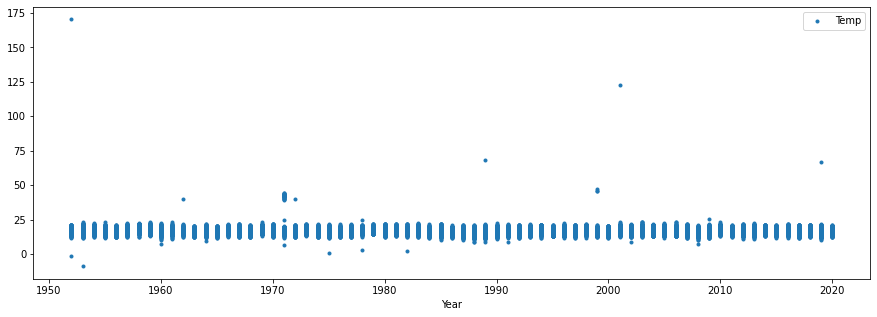

In [225]:
df.plot(x='Year',y='Temp',style='.', figsize=(15,5))

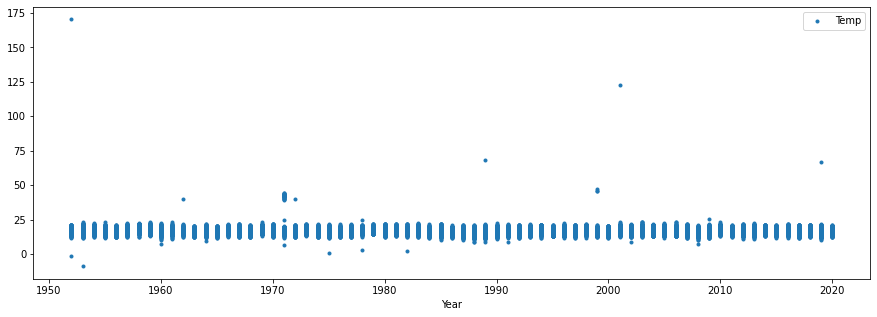

In [226]:
df.plot(x='Year',y='Temp',style='.', figsize=(15,5))

In [227]:
df.head()

,Year,Month,Day,Temperature min,Temperature max,Humidity 8:30,Humidity 2:30,Rainfall Inches,Rainfall mm,dayofyear,Temp
1952-01-01,1952,1,1,5.000000,23.888889,0.0,0.0,0,0.00,1,14.444444
1952-01-02,1952,1,2,9.444444,23.888889,0.0,0.0,0.85,21.59,2,16.666667
1952-01-03,1952,1,3,13.333333,25.000000,0.0,0.0,0,0.00,3,19.166667
1952-01-04,1952,1,4,12.222222,22.777778,0.0,0.0,0,0.00,4,17.500000
1952-01-05,1952,1,5,9.444444,22.777778,0.0,0.0,0,0.00,5,16.111111


In [452]:
train = df.loc[df['Year'] <= 2005]
test = df.loc[df['Year'] > 2006]

In [453]:
X_train=train.drop(['Temperature min','Temperature max', 'Humidity 8:30', 'Humidity 2:30','Rainfall Inches', 'Rainfall mm', 'dayofyear'], axis=1)
Y_train=train['Temp']

In [454]:
X_train.head()

,Year,Month,Day,Temp
1952-01-01,1952,1,1,14.444444
1952-01-02,1952,1,2,16.666667
1952-01-03,1952,1,3,19.166667
1952-01-04,1952,1,4,17.500000
1952-01-05,1952,1,5,16.111111


In [455]:
X_test=test.drop(['Temperature min','Temperature max', 'Humidity 8:30', 'Humidity 2:30','Rainfall Inches', 'Rainfall mm', 'dayofyear'], axis=1)
Y_test=test['Temp']

In [456]:
X_test.head(10)

,Year,Month,Day,Temp
2007-01-01,2007,1,1,12.5
2007-01-02,2007,1,2,12.0
2007-01-03,2007,1,3,13.5
2007-01-04,2007,1,4,13.5
2007-01-05,2007,1,5,13.0
2007-01-06,2007,1,6,13.5
2007-01-07,2007,1,7,12.0
2007-01-08,2007,1,8,14.0
2007-01-09,2007,1,9,15.0
2007-01-10,2007,1,10,17.5


In [457]:
X_train.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [458]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='poly',degree=8)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [459]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 8,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [460]:
df1 = pd.DataFrame({'Actual Temperature': Y_test, 'Predicted Temperature': Y_pred})  
df1[df1['Predicted Temperature']>=1].head(10)

,Actual Temperature,Predicted Temperature
2007-01-01,12.5,13.743077
2007-01-02,12.0,13.377441
2007-01-03,13.5,14.473948
2007-01-04,13.5,14.473855
2007-01-05,13.0,14.108186
2007-01-06,13.5,14.473669
2007-01-07,12.0,13.376823
2007-01-08,14.0,14.839102
2007-01-09,15.0,15.570311
2007-01-10,17.5,17.398736


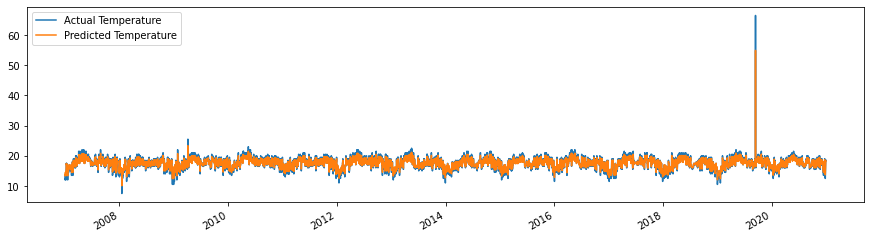

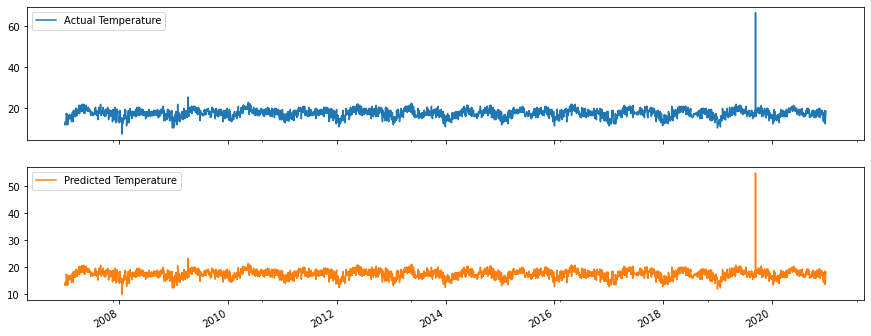

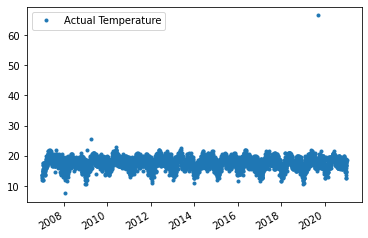

In [461]:
df1.plot(figsize=(15,4))
df1.plot(subplots=True, figsize=(15,6))
df1.plot( y=["Actual Temperature"], style='.')

In [462]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, Y_pred) 
r2

0.9385400040232639

In [463]:
X_train.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)
X_train=X_train.astype('int')
Y_train=Y_train.astype('int')
X_test=X_test.astype('int')
Y_test=Y_test.astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [464]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [465]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (13, 13, 13),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [466]:
Y_pred1 = mlp.predict(X_test)

In [467]:
df2 = pd.DataFrame({'Actual Temperature': Y_test, 'Predicted Temperature': Y_pred1})  
df2[df2['Predicted Temperature']>=1].head(10)

,Actual Temperature,Predicted Temperature
2007-01-01,12,12
2007-01-02,12,12
2007-01-03,13,13
2007-01-04,13,13
2007-01-05,13,13
2007-01-06,13,13
2007-01-07,12,12
2007-01-08,14,14
2007-01-09,15,15
2007-01-10,17,17


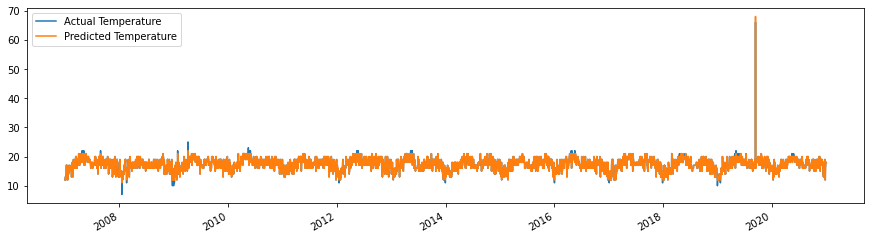

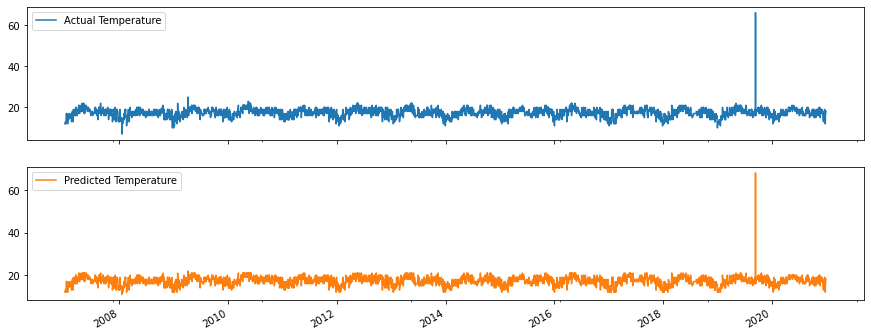

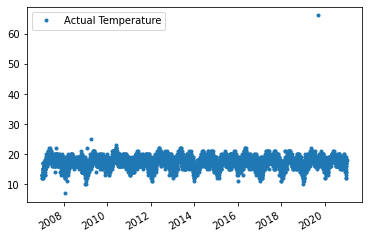

In [468]:
df2.plot(figsize=(15,4))
df2.plot(subplots=True, figsize=(15,6))
df2.plot( y=["Actual Temperature"], style='.')

In [469]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, Y_pred1) 
r2

0.9960333071035428

In [497]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred1,multioutput='uniform_average')

0.01056131429689028

In [499]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred1)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

0.1266394541196474

In [490]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC(gamma='scale',kernel='poly',degree=15)
model.fit(X_train, Y_train)

SVC(degree=15, kernel='poly')

In [491]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 15,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [492]:
Y_test

2007-01-01    12
2007-01-02    12
2007-01-03    13
2007-01-04    13
2007-01-05    13
              ..
2020-12-27    12
2020-12-28    16
2020-12-29    17
2020-12-30    18
2020-12-31    18
Name: Temp, Length: 5113, dtype: int32

In [493]:
Y_pred2 = model.predict(X_test)

In [494]:
df3 = pd.DataFrame({'Actual Temperature': Y_test, 'Predicted Temperature': Y_pred2})  
df3[df3['Predicted Temperature']>=1].head(10)

,Actual Temperature,Predicted Temperature
2007-01-01,12,13
2007-01-02,12,13
2007-01-03,13,13
2007-01-04,13,13
2007-01-05,13,13
2007-01-06,13,13
2007-01-07,12,13
2007-01-08,14,15
2007-01-09,15,16
2007-01-10,17,17


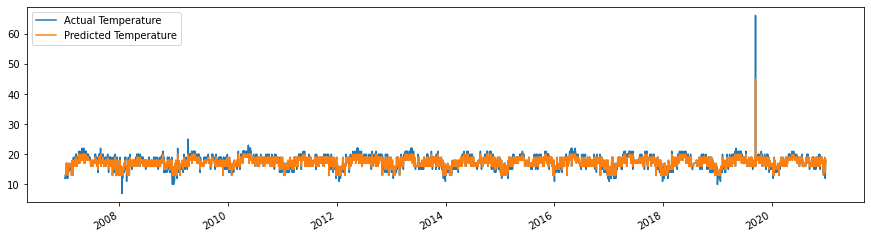

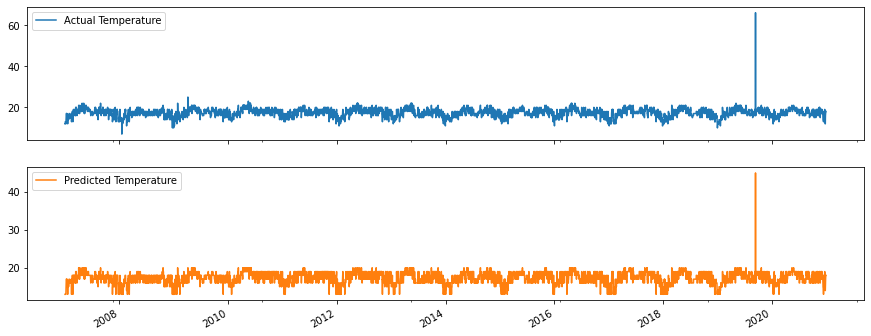

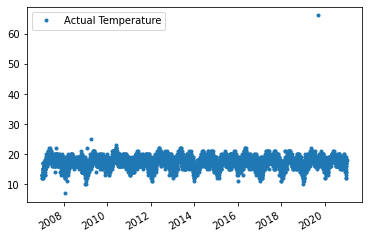

In [495]:
df3.plot(figsize=(15,4))
df3.plot(subplots=True, figsize=(15,6))
df3.plot( y=["Actual Temperature"], style='.')

In [496]:
r2 = r2_score(Y_test, Y_pred2) 
r2

0.8934797834390378

In [500]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred2,multioutput='uniform_average')

0.302366516722081

In [501]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred2)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

0.656252182807691

In [477]:
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=6)
neig.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [478]:
neig.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [479]:
Y_test3 = test['Rainfall Inches']
Y_pred3 = neig.predict(X_test)

In [480]:
df4 = pd.DataFrame({'Actual Temperature': Y_test, 'Predicted Temperature': Y_pred3})  
df4[df4['Predicted Temperature']>=1].head(10)

,Actual Temperature,Predicted Temperature
2007-01-01,12,15
2007-01-02,12,15
2007-01-03,13,15
2007-01-04,13,15
2007-01-05,13,15
2007-01-06,13,15
2007-01-07,12,15
2007-01-08,14,14
2007-01-09,15,14
2007-01-10,17,17


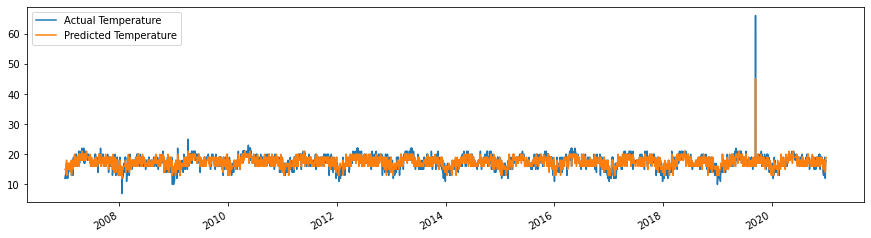

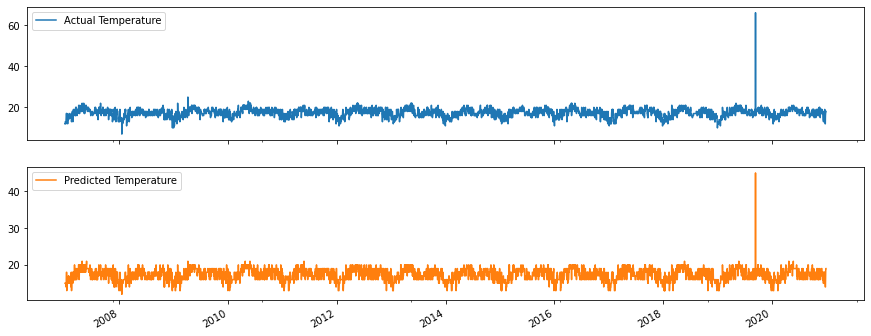

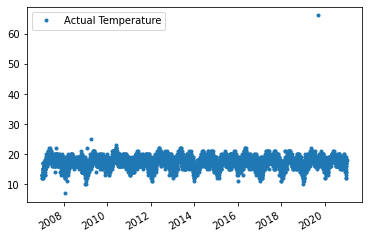

In [481]:
df4.plot(figsize=(15,4))
df4.plot(subplots=True, figsize=(15,6))
df4.plot( y=["Actual Temperature"], style='.')

In [482]:
r2 = r2_score(Y_test, Y_pred3) 
r2

0.7268786817878325

In [502]:
from sklearn.metrics import mean_absolute_error as mae

mae(Y_test, Y_pred3,multioutput='uniform_average')

0.7224721298650498

In [503]:
import math
MSE = np.square(np.subtract(Y_test, Y_pred3)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE

1.0508301878553903